In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# R_square --> tells us how good is the best fit line

## All the work below is only for one X feature but usually we'll have many many X features

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

df = pd.DataFrame()
df['X'] = x
df['Y'] = y
df.head(2)


,X,Y
0,1,2
1,2,4


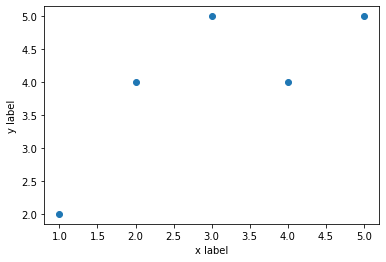

In [3]:
m1 = plt.scatter(x=df['X'], y=df['Y'])
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

## All the work below is only for one X feature but usually we'll have many many X features

# To calculate the R_square
1. find the mean value of the y axix
2. then Subtract each value of y actual from the mean (actual - mean)
3. then we draw a regression line and come up with the estimated values
4. then estimated distance minuse the y mean (estimate - mean)
5. 

In [4]:
# 1. find the mean of y value
def findTheMeanOfYvalue(yValues):
    return sum(yValues) / len(yValues)


# 2. then Subtract each value of y actual from the mean (actual - mean)
def yActualMinuseYmean(yActual, yMean):
    resu = []
    for cell in yActual:
        resu.append(cell - yMean)
    return resu  # the sum of this should be 0


def yActualMinuseYmeanSquare(yActual, yMean):
    resu = []
    for cell in yActual:
        resu.append((cell - yMean) ** 2)
    return resu


rr = yActualMinuseYmeanSquare(df['Y'], findTheMeanOfYvalue(df['Y']))
print(rr)

[4.0, 0.0, 1.0, 0.0, 1.0]


### Now lets draw a estimated line  of -----> y = 2.2 + 0.6*x

In [5]:
# 3. then we draw a regression line and come up with the estimated values

def drawEstimatedLine(xValues):
    estimateList = []
    for xcell in xValues:
        y = 2.2 + (0.6 * xcell)
        estimateList.append(round(y, 2))
    return estimateList
myRes = drawEstimatedLine(df['X'])
myRes

[2.8, 3.4, 4.0, 4.6, 5.2]

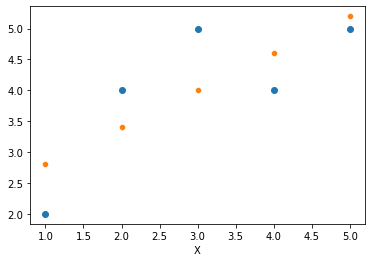

In [6]:
m2 = plt.scatter(x=df['X'], y=df['Y'])
m3 = sns.scatterplot(x=df['X'], y=myRes)
# m4 = plt.plot(df['X'], myRes, '-r', label='y=0.6x + 2.2')

In [17]:
# 4. then estimated distance minuse the y mean (estimate - mean)
def estimatedMinuseMean(estimated, mean):
    return [round(ycell - mean, 2) for ycell in estimated]
c = estimatedMinuseMean(myRes,  findTheMeanOfYvalue(df['Y']))


def estimatedMinuseMeanSquare(estimated, mean):
    return [round((mean - ycell) ** 2, 2) for ycell in estimated]
rrr = estimatedMinuseMeanSquare(myRes,  findTheMeanOfYvalue(df['Y']))
rrr
    

[1.44, 0.36, 0.0, 0.36, 1.44]

# Finally  R-square  =  sum(y_predicted - y_mean) ** 2  /  sum(y - y_mean) ** 2

In [18]:
r_square = 3.6 / 6
r_square = 0.6

# r_square = 0.6 is Pretty much good 
# when r_square gets closer to 1 it is the best line
# if there is a large distance b/n the estimated line and the actual datas it is bad 

# We can create a data frame

In [20]:
df['y-y_mean'] = yActualMinuseYmean(df['Y'], findTheMeanOfYvalue(df['Y']))
df['y-y_meanSquare'] = yActualMinuseYmeanSquare(df['Y'], findTheMeanOfYvalue(df['Y']))
df['y_hot'] = drawEstimatedLine(df['X'])
df['y_hot-y_mean'] = estimatedMinuseMean(df['y_hot'], findTheMeanOfYvalue(df['Y']))
df['y_hot-y_meanSquare'] = estimatedMinuseMeanSquare(df['y_hot'], findTheMeanOfYvalue(df['Y']))
df

,X,Y,y-y_mean,y-y_meanSquare,y_hot,y_hot-y_mean,y_hot-y_meanSquare
0,1,2,-2.0,4.0,2.8,-1.2,1.44
1,2,4,0.0,0.0,3.4,-0.6,0.36
2,3,5,1.0,1.0,4.0,0.0,0.00
3,4,4,0.0,0.0,4.6,0.6,0.36
4,5,5,1.0,1.0,5.2,1.2,1.44


## All the work above is only for one X feature but usually we'll have many many X features